In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data = pd.read_csv('airlines_flights_data.csv')

In [42]:
# Jumlah data (baris dan kolom)
print("Jumlah data (baris, kolom):", data.shape)

Jumlah data (baris, kolom): (300153, 12)


In [43]:
data

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [44]:
# Informasi tentang tipe data dan skema pengkodean
print("\nInformasi tipe data dan skema pengkodean:")
print(data.info())


Informasi tipe data dan skema pengkodean:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None


# Data Cleaning

In [45]:
# Analisis Nilai Hilang (Missing Values)
missing_values = data.isnull().sum()
print("\nNumber of Missing Values per Column:")
print(missing_values)


Number of Missing Values per Column:
index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [46]:
# Cek data duplikat
data.duplicated().sum()

0

# Data Selection

In [47]:
kolom_drop = ['index', 'flight']
data_model = data.drop(columns=kolom_drop)
data_model

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# Exploratory Data Analysis

In [48]:
print(data_model.describe())

            duration      days_left          price
count  300153.000000  300153.000000  300153.000000
mean       12.221021      26.004751   20889.660523
std         7.191997      13.561004   22697.767366
min         0.830000       1.000000    1105.000000
25%         6.830000      15.000000    4783.000000
50%        11.250000      26.000000    7425.000000
75%        16.170000      38.000000   42521.000000
max        49.830000      49.000000  123071.000000


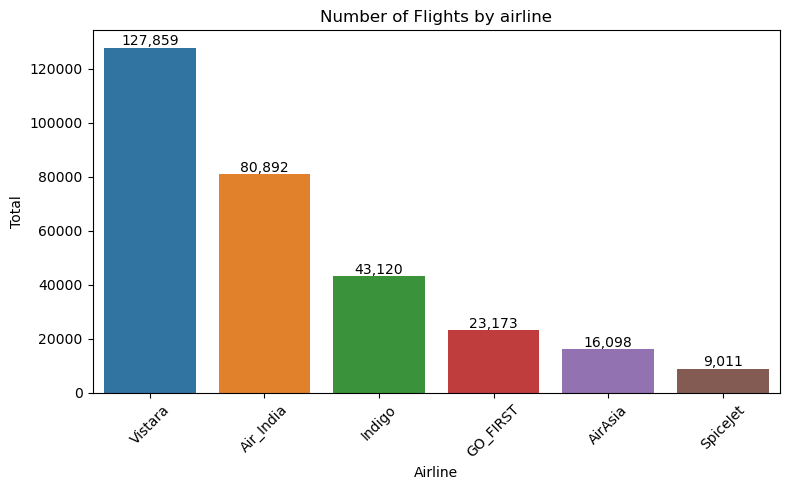

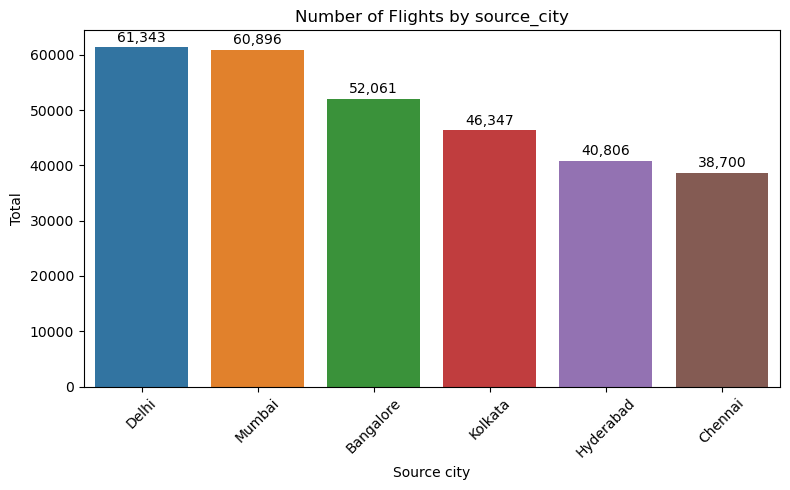

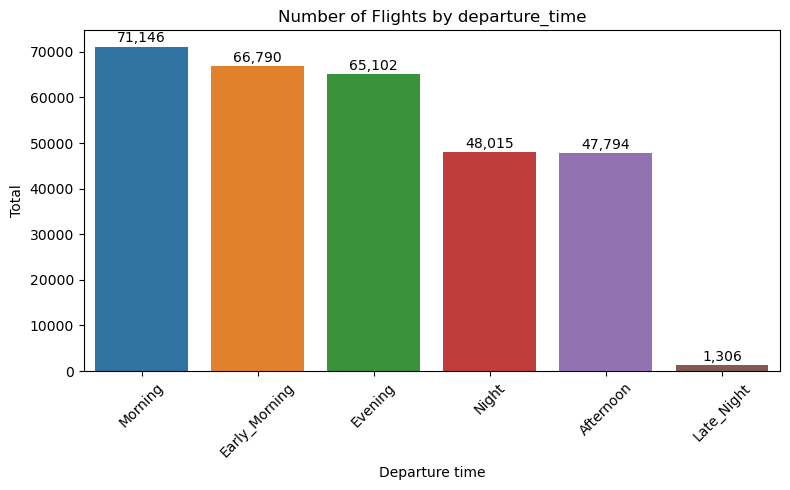

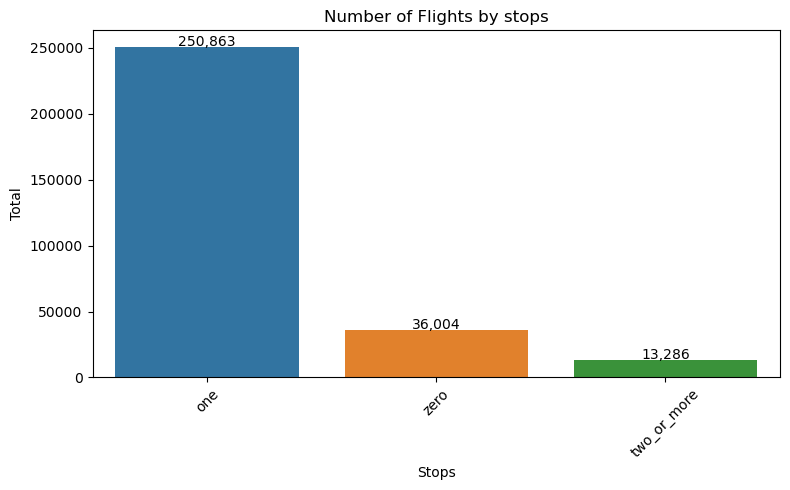

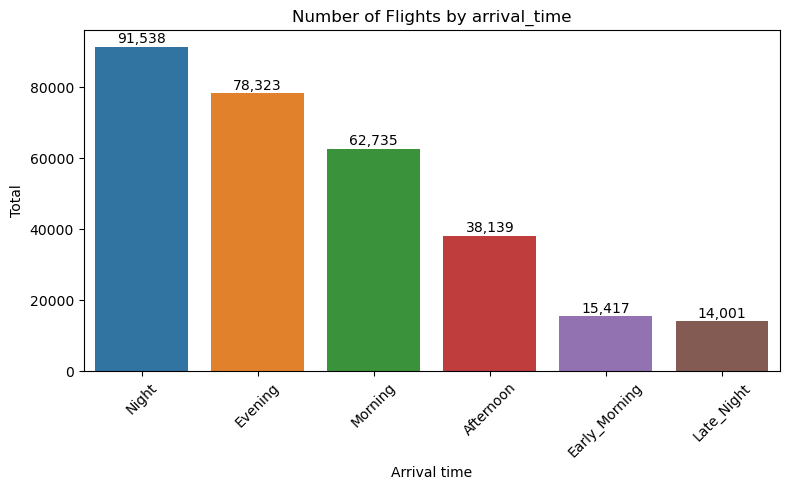

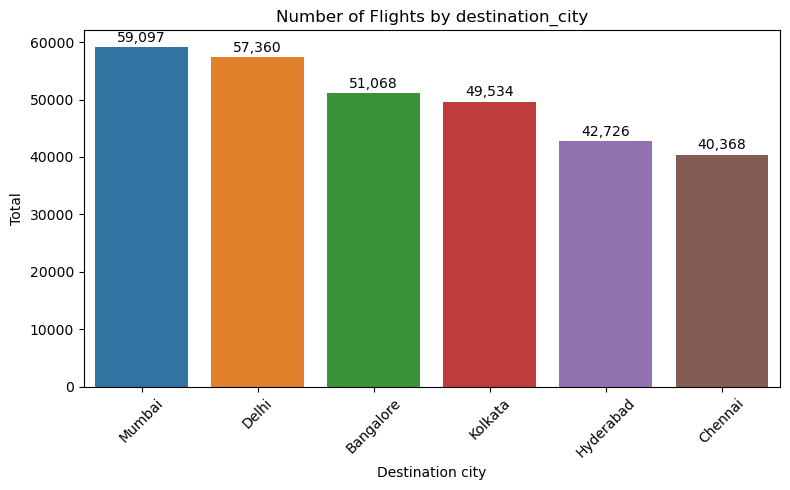

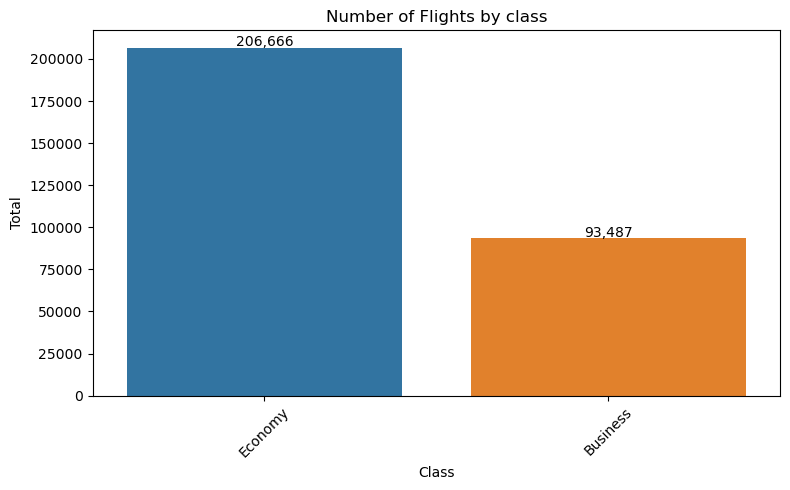

In [49]:
kolom_kategorikal = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time','destination_city', 'class']

for kolom in kolom_kategorikal:
    plt.figure(figsize=(8, 5))
    ax=sns.countplot(data=data_model, x=kolom, order=data_model[kolom].value_counts().index)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 1000,  
                f'{int(height):,}', ha="center", fontsize=10)
    plt.title(f'Number of Flights by {kolom}')
    plt.xlabel(kolom.capitalize().replace('_', ' '))
    plt.ylabel('Total')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

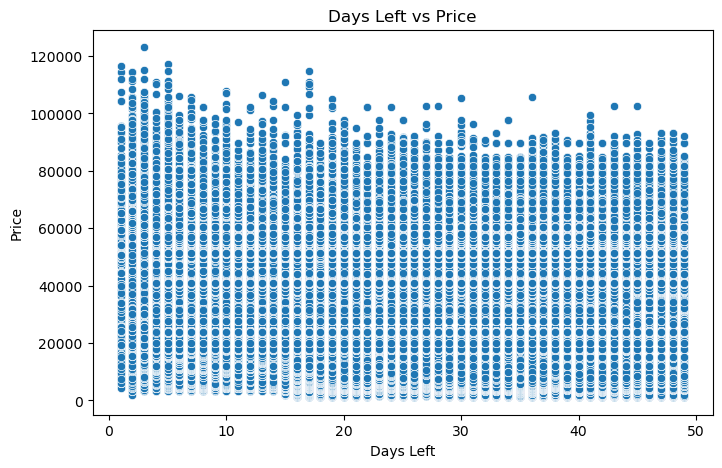

In [50]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='days_left', y='price', data=data_model)
plt.title('Days Left vs Price')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.show()

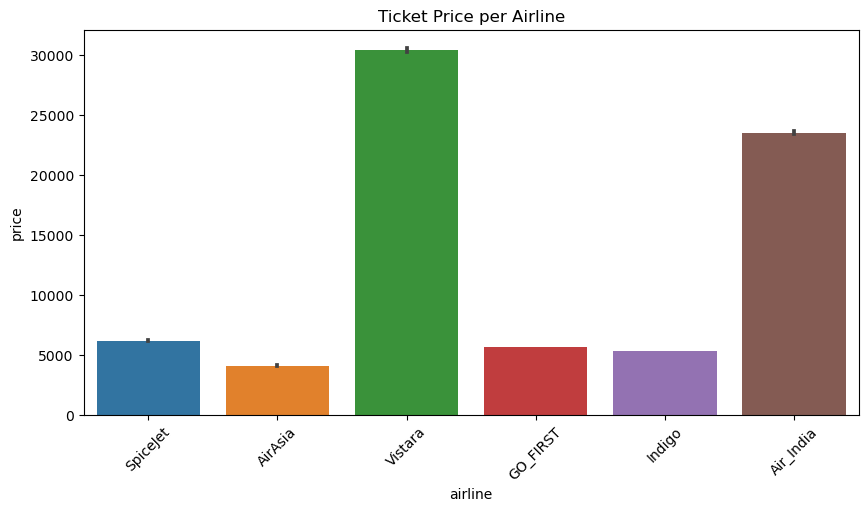

In [51]:
plt.figure(figsize=(10, 5))
sns.barplot(x='airline', y='price', data=data_model)
plt.xticks(rotation=45)
plt.title('Ticket Price per Airline')
plt.show()

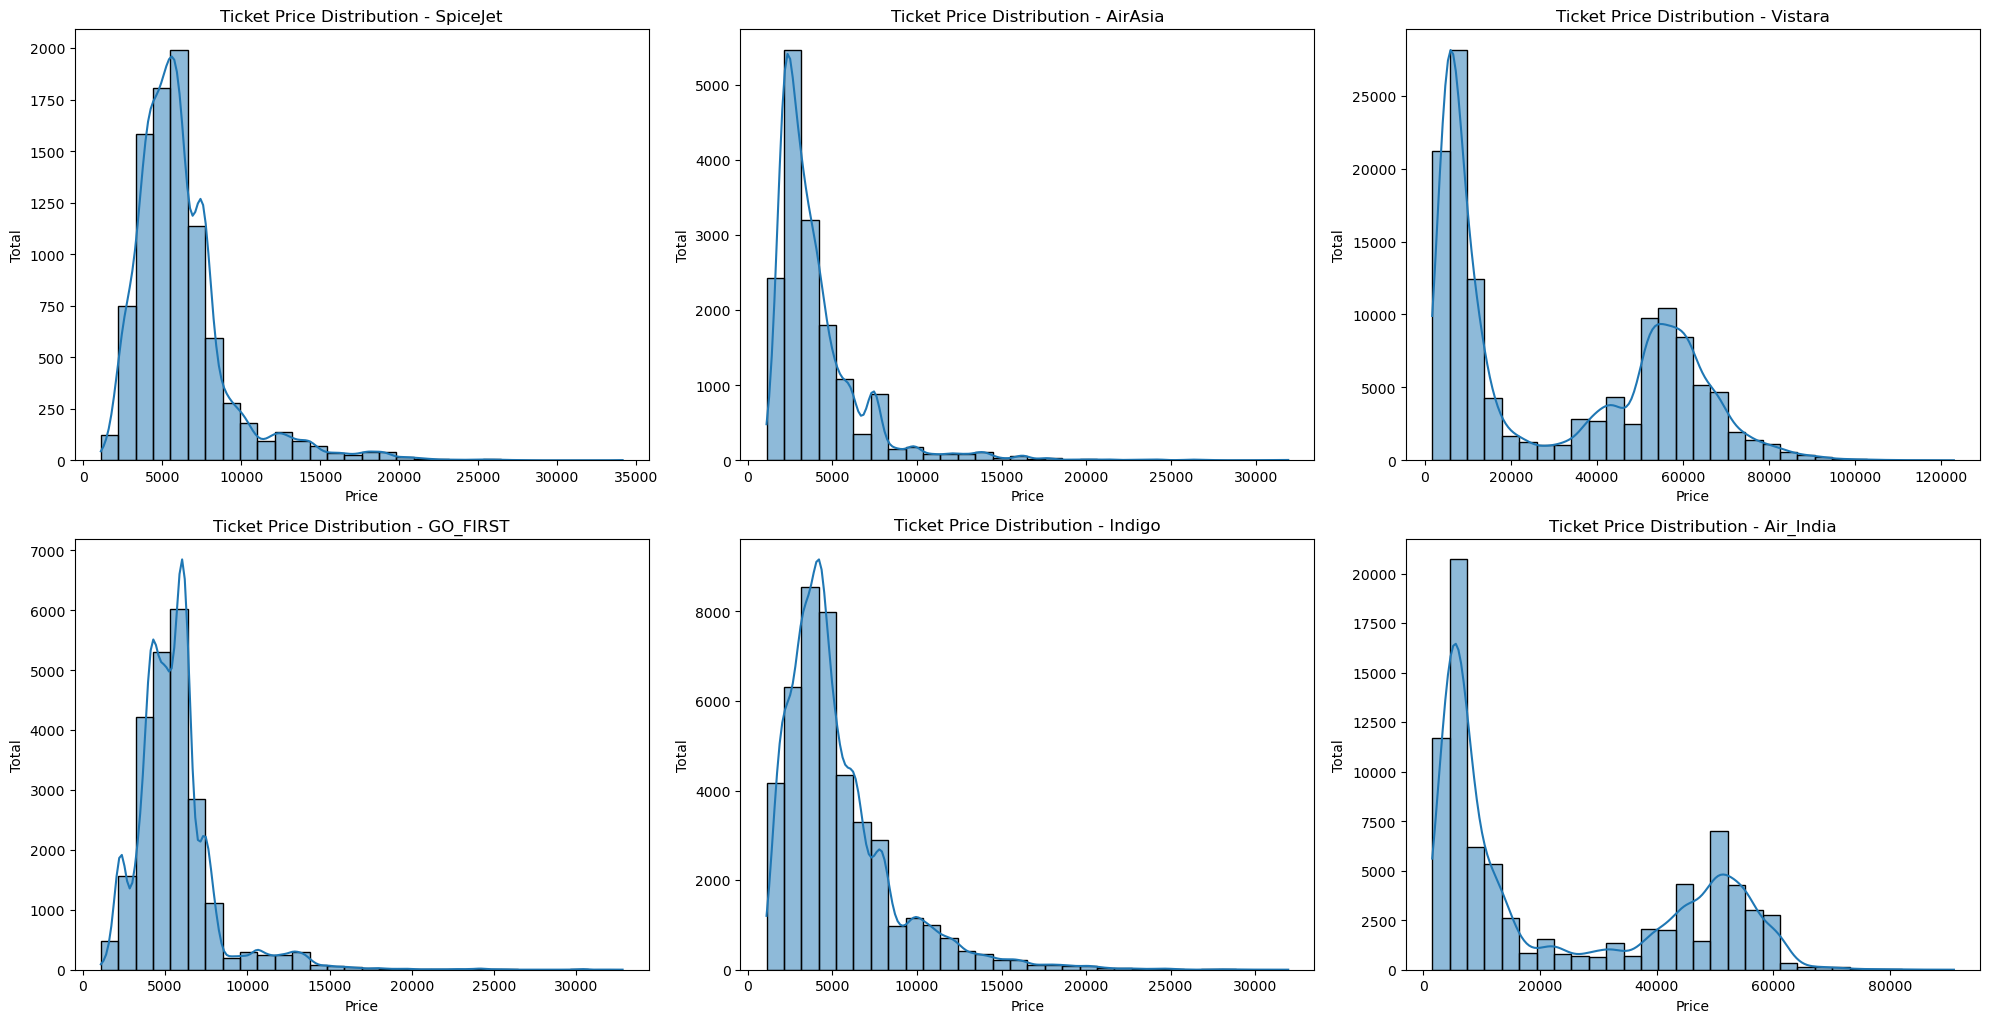

In [52]:
maskapai = data_model['airline'].unique()

plt.figure(figsize=(20, 15))
for i, airline in enumerate(maskapai, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data_model[data_model['airline'] == airline]['price'], bins=30, kde=True)
    plt.title(f'Ticket Price Distribution - {airline}')
    plt.xlabel('Price')
    plt.ylabel('Total')

plt.tight_layout()
plt.show()

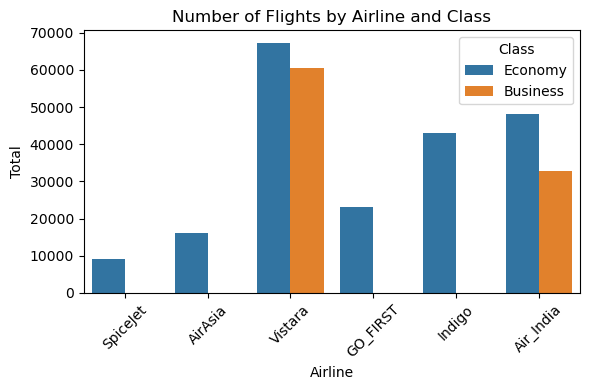

In [70]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data_model, x='airline', hue='class')
plt.title('Number of Flights by Airline and Class')
plt.xlabel('Airline')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.legend(title='Class')
plt.tight_layout()
plt.show()

# Data Transformation

In [54]:
# menghitung jumlah data menurut kelas
for col in kolom_kategorikal:
    print(f"\nColumn distribution: {col}")
    print(data_model[col].value_counts())


Column distribution: airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

Column distribution: source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

Column distribution: departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

Column distribution: stops
one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

Column distribution: arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

Column distribution: destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata   

In [55]:
from sklearn.preprocessing import LabelEncoder
data_model_encoded = data_model.copy()
label_encoder = LabelEncoder()
for col in kolom_kategorikal:
    data_model_encoded[col] = label_encoder.fit_transform(data_model_encoded[col])
data_model_encoded

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49,69265
300149,5,1,0,0,5,3,0,10.42,49,77105
300150,5,1,1,0,5,3,0,13.83,49,79099
300151,5,1,1,0,2,3,0,10.00,49,81585


In [56]:
for col in kolom_kategorikal:
    print(f"\nColumn distribution '{col}':")
    print(data_model_encoded[col].value_counts())


Column distribution 'airline':
5    127859
1     80892
3     43120
2     23173
0     16098
4      9011
Name: airline, dtype: int64

Column distribution 'source_city':
2    61343
5    60896
0    52061
4    46347
3    40806
1    38700
Name: source_city, dtype: int64

Column distribution 'departure_time':
4    71146
1    66790
2    65102
5    48015
0    47794
3     1306
Name: departure_time, dtype: int64

Column distribution 'stops':
0    250863
2     36004
1     13286
Name: stops, dtype: int64

Column distribution 'arrival_time':
5    91538
2    78323
4    62735
0    38139
1    15417
3    14001
Name: arrival_time, dtype: int64

Column distribution 'destination_city':
5    59097
2    57360
0    51068
4    49534
3    42726
1    40368
Name: destination_city, dtype: int64

Column distribution 'class':
1    206666
0     93487
Name: class, dtype: int64


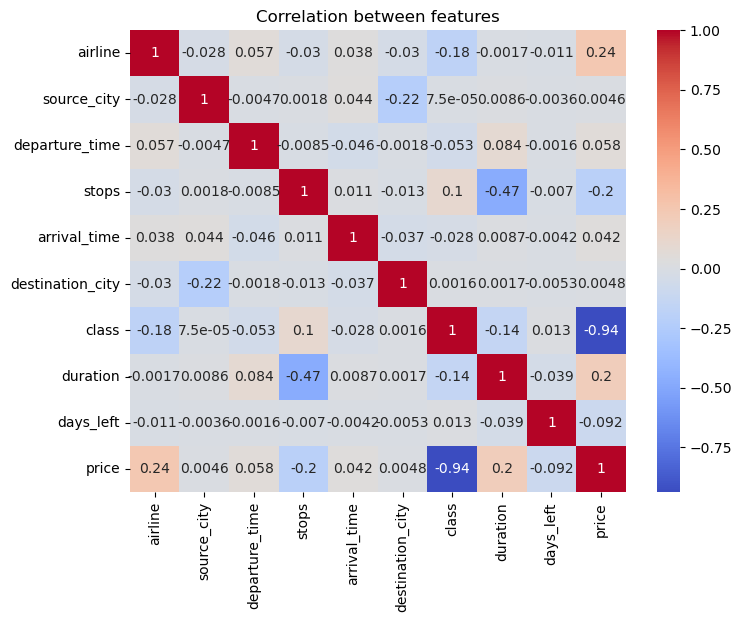

In [57]:
plt.figure(figsize=(8, 6))
sns.heatmap(data_model_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between features")
plt.show()

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_model_encoded)
data_scaled = pd.DataFrame(data_scaled, columns=data_model_encoded.columns)
data_scaled

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.8,0.4,0.4,1.0,1.0,1.0,1.0,0.027347,0.0,0.039749
1,0.8,0.4,0.2,1.0,0.8,1.0,1.0,0.030612,0.0,0.039749
2,0.0,0.4,0.2,1.0,0.2,1.0,1.0,0.027347,0.0,0.039773
3,1.0,0.4,0.8,1.0,0.0,1.0,1.0,0.028980,0.0,0.039765
4,1.0,0.4,0.8,1.0,0.8,1.0,1.0,0.030612,0.0,0.039765
...,...,...,...,...,...,...,...,...,...,...
300148,1.0,0.2,0.8,0.0,0.4,0.6,0.0,0.188776,1.0,0.558844
300149,1.0,0.2,0.0,0.0,1.0,0.6,0.0,0.195714,1.0,0.623124
300150,1.0,0.2,0.2,0.0,1.0,0.6,0.0,0.265306,1.0,0.639473
300151,1.0,0.2,0.2,0.0,0.4,0.6,0.0,0.187143,1.0,0.659856


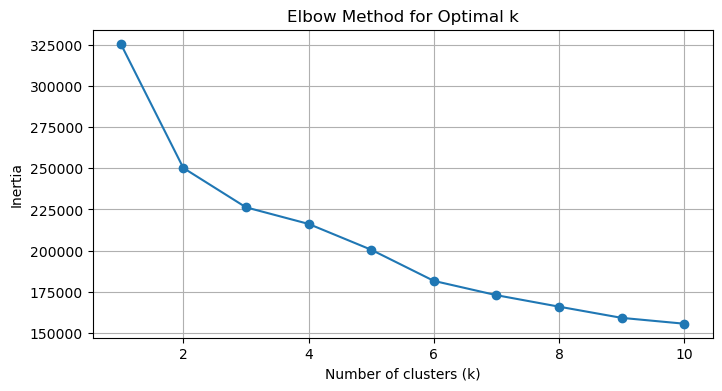

In [60]:
from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


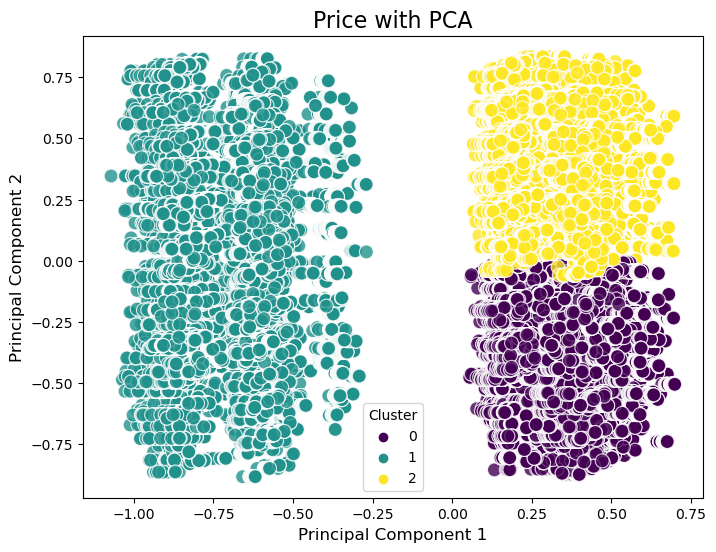

In [61]:
from sklearn.decomposition import PCA

# K-Means Clustering with k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
data_model['Cluster'] = kmeans.fit_predict(data_scaled)

# PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data_model['Cluster']

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.8)
plt.title('Price with PCA', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()

In [62]:
# Modeling dengan KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
data_model['Cluster'] = kmeans.labels_
data_model

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Cluster
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,0
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,1
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,1
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,1
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,1


In [63]:
numerical_features = ['duration','days_left','price']
data_model.groupby('Cluster')[numerical_features].agg(['min', 'max'])

duration        days_left      price        
             min    max       min max    min     max
Cluster                                             
0           0.83  47.75         1  49   1105   42349
1           1.00  47.75         1  49  12000  123071
2           0.83  49.83         1  49   1443   36911

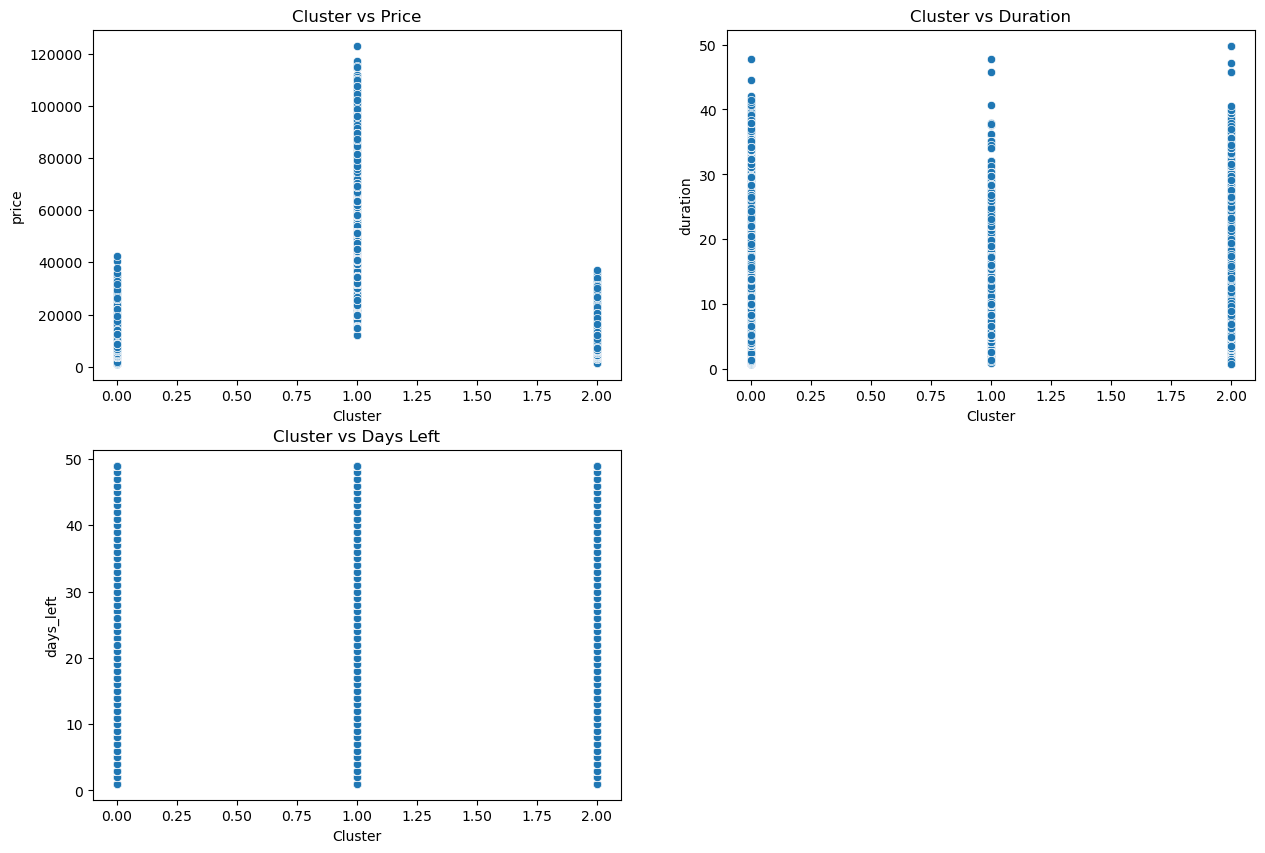

In [64]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Cluster', y='price', data=data_model)
plt.title('Cluster vs Price')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Cluster', y='duration', data=data_model)
plt.title('Cluster vs Duration')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Cluster', y='days_left', data=data_model)
plt.title('Cluster vs Days Left')

plt.show()

In [65]:
for feature in kolom_kategorikal:
    print(f"\n--- Categorical Feature Analysis: {feature} ---")

    print(f"Total Value Counts for {feature} :")
    print(data_model[feature].value_counts())
    print("-" * 50) 

    print(f"Total Number per Cluster:")
    cross_tab_abs = pd.crosstab(data_model['Cluster'], data_model[feature])
    print(cross_tab_abs)

    print(f"\nMost Frequently Appearing Categories per Cluster for {feature}:")
    print(data_model.groupby('Cluster')[feature].agg(lambda x: x.mode()[0] if not x.mode().empty else 'N/A'))


--- Categorical Feature Analysis: airline ---
Total Value Counts for airline :
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64
--------------------------------------------------
Total Number per Cluster:
airline  AirAsia  Air_India  GO_FIRST  Indigo  SpiceJet  Vistara
Cluster                                                         
0           8138      24070     11463   21677      4644    33758
1              0      32898         0       0         0    60589
2           7960      23924     11710   21443      4367    33512

Most Frequently Appearing Categories per Cluster for airline:
Cluster
0    Vistara
1    Vistara
2    Vistara
Name: airline, dtype: object

--- Categorical Feature Analysis: source_city ---
Total Value Counts for source_city :
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int

In [66]:
data_model

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Cluster
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,0
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,1
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,1
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,1
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,1


In [67]:
# Filter data untuk mencari tiket dengan harga maksimum
data_model[data_model['price'] == data_model['price'].max()][['airline', 'price', 'class']]

,airline,price,class
261377,Vistara,123071,Business


In [68]:
data_model['Cluster'].value_counts()

0    103750
2    102916
1     93487
Name: Cluster, dtype: int64